# Table of contents
* [1 Business understanding](#Section_1)
* [2 Data understanding](#Section_2)
    * [2.1 Import packages and read data](#Section_2_1)
    * [2.2 Initial data cleaning](#Section_2_2)
    * [2.3 Price distribution](#Section_2_3)
    * [2.4 Remove outliers](#Section_2_4)
    * [2.5 Basemap plot](#Section_2_5)
    * [2.6 Numerical variable analysis](#Section_2_6)
    * [2.7 Categorical variable analysis](#Section_2_7)
* [3 Data preparation](#Section_3)
    * [3.1 Numerical variable selection](#Section_3_1)
    * [3.2 Categorical Variables selction](#Section_3_2)
    * [3.3 Construct and format data](#Section_3_3)
* [4 Data modeling and evaluation](#Section_4)
    * [4.1 LinearRegression modeling](#Section_4_1)
    * [4.2 Evaluate the Results](#Section_4_2)
    * [4.3 Find optimal LinearRegression model](#Section_4_3)
    * [4.4 Modeling with the best linear model](#Section_4_4)
    * [4.5 Compare the Results](#Section_4_5)
    * [4.6 Explore RidgeCV](#Section_4_6)
    
# Questions
* [Questions 1 and 2 raised](#Section_q12)
    * [Questions 1 and 2 discussion 1](#Section_anws_q12_1)
    * [Questions 1 and 2 discussion 2](#Section_anws_q12_2)
* [Questions 3 raised](#Section_q3)
    * [Questions 3 discussion](#Section_anws_q3)
    

# 1 Business understanding <a class='anchor' id='Section_1'>
On one hand, it is popular nowadays that people become an Airbnb host and make extra money with their extra assets or even an extra room in their own home. More and More people are thinking of investing a new property and transform it to an Airbnb. Here comes the questions, what should the hosts consider to make their listing property attactive in order to increase the listing price? 

On the other hand, hosts tend to remove their listing if there is no or very few booking for a long time. Thinking from the view of Airbnb, can we predict the listing price for the hosts and recommend them a reasonable price so they can attract more guests? How to select variables to get a reasonable price estimator?


In this notebook, I dug into the Boston Airbnb listing data from 2019 to answer the questions summerized in the following:
1. What are the top factors affect the listing price? 
2. How does the factors affect the listing price? increase or decrease?
3. Can we predict the listing price in Boston? How to select variables?

The data can be found in [here](https://www.kaggle.com/airbnb/boston/kernels). 

# 2 Data understanding <a class='anchor' id='Section_2'>
## 2.1 Import packages and read data <a class='anchor' id='Section_2_1'>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from mpl_toolkits.basemap import Basemap 
plt.style.use("seaborn-colorblind")
%matplotlib inline

listings = pd.read_csv('./data/listings.csv')
pd.set_option('display.max_columns', 100)
print (listings.shape)
listings.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

Observation: The data contains 95 variables (columns), which means that we need to deal with a problem with many dimensions of freedom. Thus, we need to pay more attention later when selecting the variebles or even drop some varibles that are obviously not affect the response, which is the price. 

Some varibles that I observed are not usefull are: 'id', 'host_id', 'scrape_id', 'listing_url', 'jurisdiction_names','license','thumbnail_url', 'medium_url', 'picture_url',
'xl_picture_url','host_thumbnail_url','host_picture_url'

## 2.2 Initial data cleaning <a class='anchor' id='Section_2_2'>
### 2.2.1 Drop unrelated variables

In [2]:
# Drop some columns that are not related to price
dropcol = ['id', 'host_id', 'listing_url','scrape_id','jurisdiction_names','license','thumbnail_url',
           'medium_url','picture_url','xl_picture_url','host_thumbnail_url',
           'host_picture_url']
listings.drop(dropcol, axis=1, inplace=True)
listings.shape

(3585, 83)

### 2.2.2 Change data type
In this step, we will fix some datatype errors, extract numbers and change to float type

In [3]:
# find the columns with price involved and observe the data
price_cols_index = listings.columns[listings.columns.str
                                    .contains('cleaning_fee|deposit|price|extra_people') == True]
price_cols = listings[price_cols_index]
print ('price_cols_index:')
print (price_cols_index)
price_cols.head()

price_cols_index:
Index(['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people'],
      dtype='object')


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$250.00,NaN,NaN,NaN,$35.00,$0.00
1,$65.00,$400.00,NaN,$95.00,$10.00,$0.00
2,$65.00,$395.00,"$1,350.00",NaN,NaN,$20.00
3,$75.00,NaN,NaN,$100.00,$50.00,$25.00
4,$79.00,NaN,NaN,NaN,$15.00,$0.00


Observation: We see $ sign in the price variebles, thus we need to remove that sign and also change the varible type to float so that it can be measured 

In [4]:
# romove $ in the price value and change the data type to float
for variable in price_cols_index:
    listings[variable] = listings[variable].map(lambda x: x.replace("$",'').replace(",",''),
                                              na_action = 'ignore')
    listings[variable] = listings[variable].astype(float)
listings[price_cols_index].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,250.0,NaN,NaN,NaN,35.0,0.0
1,65.0,400.0,NaN,95.0,10.0,0.0
2,65.0,395.0,1350.0,NaN,NaN,20.0
3,75.0,NaN,NaN,100.0,50.0,25.0
4,79.0,NaN,NaN,NaN,15.0,0.0


In [5]:
# remove % in the rating value and change the data type to float
rate_cols_index = listings.columns[listings.columns.str.contains('rate') == True]
rate_cols = listings[rate_cols_index]
print ('rate_cols_index:')
print (rate_cols_index)
rate_cols.head()

rate_cols_index:
Index(['host_response_rate', 'host_acceptance_rate'], dtype='object')


,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100%,100%
2,100%,88%
3,100%,50%
4,100%,100%


Observation: We see % sign in the variebles regarding rate, thus we need to remove that sign and also change the varible type to float so that it can be measured 

In [6]:
# romove % in the rate value and change the data type to float
for variable in rate_cols_index:
    listings[variable] = listings[variable].map(lambda x: x.replace("%",''),
                                              na_action = 'ignore')
    listings[variable] = listings[variable].astype(float)
listings[rate_cols_index ].head()

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100.0,100.0
2,100.0,88.0
3,100.0,50.0
4,100.0,100.0


### 2.2.3 Drop missing data
In this step, we will drop some missing data.
- For any row of data, a listing, if the price value is missing, we should drop this row of data, since it will not help us predict the price when there is no price.
- For any column of data, a varieble, if more than 50% of data is missing, we will drop that column. The reason is that most of the data missing will not help us get an model with accuracy due to lack of information.


In [7]:
# Drop rows with missing price values
listings_dropna = listings.dropna(subset=['price'], axis=0)

# find the columns that have more than 50% data as nan
nan_cols = listings.columns[listings.isnull().mean() > 0.50]
print ('nan_cols')
print (nan_cols)

# drop the columns with more than 50% data missing
listings_dropna = listings.drop(nan_cols, axis=1)
listings_dropna.shape

nan_cols
Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability'],
      dtype='object')


(3585, 76)

In [8]:
listings_dropna.shape

(3585, 76)

## 2.3 Price distribution <a class='anchor' id='Section_2_3'>

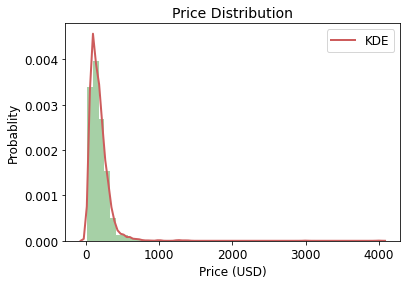

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [9]:
# histogram plot to see the price distribution
sns.distplot(listings_dropna['price'], color='forestgreen',
             kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
plt.title('Price Distribution', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['KDE'], prop={"size":12})
plt.show()
# price description
listings_dropna.describe().price

**Observation:** 
1. It follows positive distribution, 75% of the data are in the range below 220 USD. Most of the data are in the range below 500 USD. 
2. In this study, the price range is selected in the range 20 to 500 USD, which is reasonable for an Airbnb listing price and also falls into people's expection. 

## 2.4 Remove outliers <a class='anchor' id='Section_2_4'>

In this step, outliers are removed for unreasonbale Airbnb prices. The data where price below 20 will be removed from the following analysis since it is rare for a listing price below 20. In addition, the data where the price beyond 500 will be removed as well since most of the data are in that range which can be seen from the price distribution plot. 

In [10]:
# retain the data where the price range is in $20 to $500
listings_new = listings_dropna[(listings_dropna['price'] >20) & 
                                  (listings_dropna['price'] <500)]
listings_new.shape

(3491, 76)

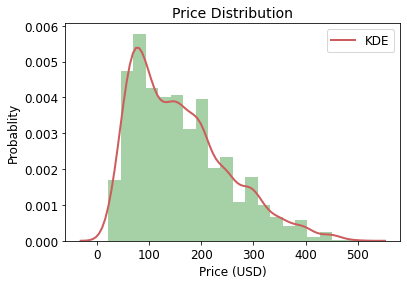

count    3491.000000
mean      159.668863
std        90.922800
min        22.000000
25%        85.000000
50%       147.000000
75%       210.000000
max       499.000000
Name: price, dtype: float64

In [11]:
# histogram plot to see the price distribution in the selcted range < $500
sns.distplot(listings_new['price'], bins=20, color='forestgreen',
             kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
plt.title('Price Distribution', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['KDE'], prop={"size":12})
plt.show()
# price description
listings_new.describe().price

## 2.5 Basemap plot <a class='anchor' id='Section_2_5'>

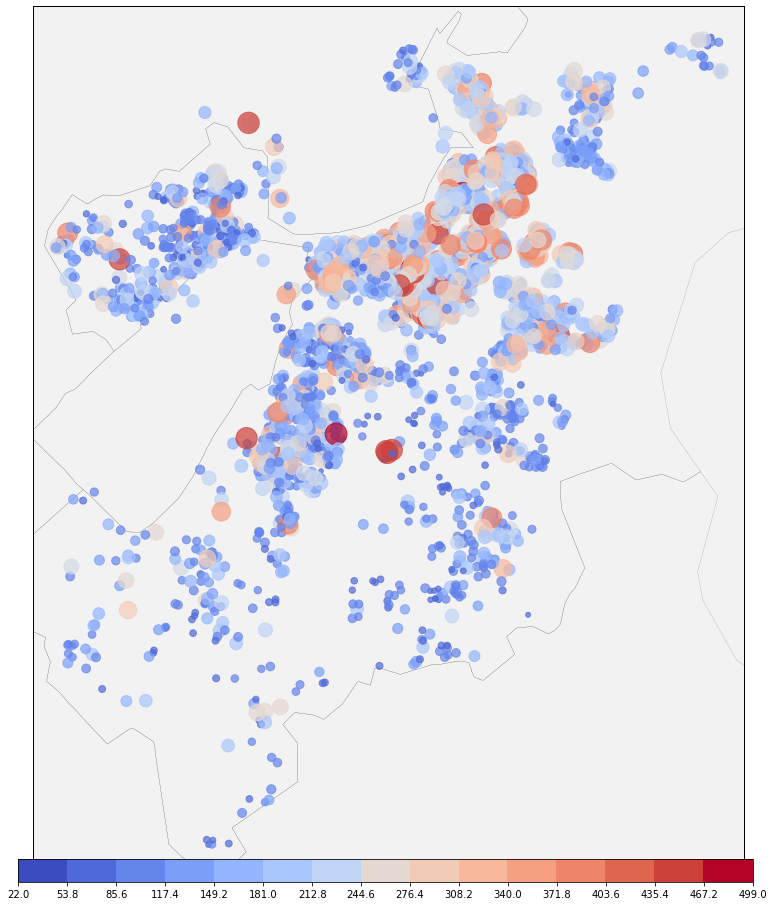

In [12]:
lat_max = listings_new.latitude.max()
lat_min = listings_new.latitude.min()
lon_max = listings_new.longitude.max()
lon_min = listings_new.longitude.min()
edge = 0.006

fig = plt.figure(figsize=(17,16))
m = Basemap(projection='merc', llcrnrlat=lat_min-edge, urcrnrlat=lat_max+edge, llcrnrlon=lon_min-edge, urcrnrlon=lon_max+edge)
# m.drawmapboundary(fill_color='aqua')
m.drawmapboundary(fill_color=[0.95, 0.95, 0.95, 1  ])
m.drawcounties(linewidth=0.1, linestyle='-', color='k', antialiased=1, facecolor='none', ax=None, zorder=None, drawbounds=False)

num_colors =16
values = listings_new.price
price_min = values.min()
price_max = values.max()

cm = plt.get_cmap('coolwarm',num_colors)
bins = np.linspace(values.min(), values.max(), num_colors)

color = cm (np.digitize(values, bins))


x,y = m(listings_new.longitude.values, listings_new.latitude.values)
scat = m.scatter(x,y, s = listings_new.price, color = color, alpha=0.7)
# Draw color legend.
                        #[left, top, width, height]
ax_legend = fig.add_axes([0.21, 0.12, 0.6, 0.02])
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cm, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
plt.box(False)
cb.ax.set_frame_on(False)
plt.show()

**Observation**

One obvious trend is that the high price listings are most in the city center, and the low price listings are most in the suburb, which makes common sense. 

# Question 1: What are the top factors affect the listing price? Question 2: How does different factors affect the listing price? increase or decrease?  <a class='anchor' id='Section_q12'> 

In **section 2.6** and **2.7**, descriptive analysis are conducted and factors affecting the price inluding the **numerical** and **catorgorical variables** are studied. **Heatmap** of correlation between the numberical varibles and the responce price are plotted. The top numerical factors as well as their effect on the price are discussed. Ragarding the categorical varibles, several factors which may affect the price are studied with **box plot** and their effect on the price is discussed. 

## 2.6 Numerical variable analysis <a class='anchor' id='Section_2_6'>

### Add one numerical variable: n_amenities
Amenities are one of the important factors that affects the price, in this step, the amenities column(strs) is transformed to a new numerical variable, which is number of amenities

In [15]:
# retain the data where the price range is in $20 to $500
listings_new = listings_dropna[(listings_dropna['price'] >20) & 
                                  (listings_dropna['price'] <500)]
listings_new.shape

(3491, 76)

In [16]:
# amenities are one important variable that affect the price, observe the first data 
amenities_col = listings_new['amenities']
print ('amenities_col[0]:')
print (amenities_col[0])

# Calculate the numbers of amenities and use them as the values for the amenities column
listings_new.loc[:,'amenities'] = listings_new['amenities'].apply(lambda x: len(x.split(','))).values
listings_new['amenities'].head()

amenities_col[0]:
{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}


0    15
1    21
2    18
3    23
4    14
Name: amenities, dtype: int64

### Imputing missing numerical values 
In this step, the numerical vraibles are extracted from the listing data. The missing values are filled with the mean value, which is one of the most frequently used method in data science. 

In [17]:
# extract numerical variables, drop variables that are not affect the price, 
# fill the nan with mean, and check nan in the end
num_cols = listings_new[listings_new.select_dtypes(include=['float', 'int']).columns]
num_cols = num_cols.drop(['latitude', 'longitude'], axis=1)
num_cols = num_cols.apply(lambda col: col.fillna(col.mean()), axis=0)
# num_cols.isnull().mean()

### Heatmap plot 
In this step, the correlations between the numerical variebles are visualized with heatmap. The corr of the numerical variebles with price are ordered in a descending order, where the blue indicates positive effect on price, while the orange indicates negtive effect on price. 

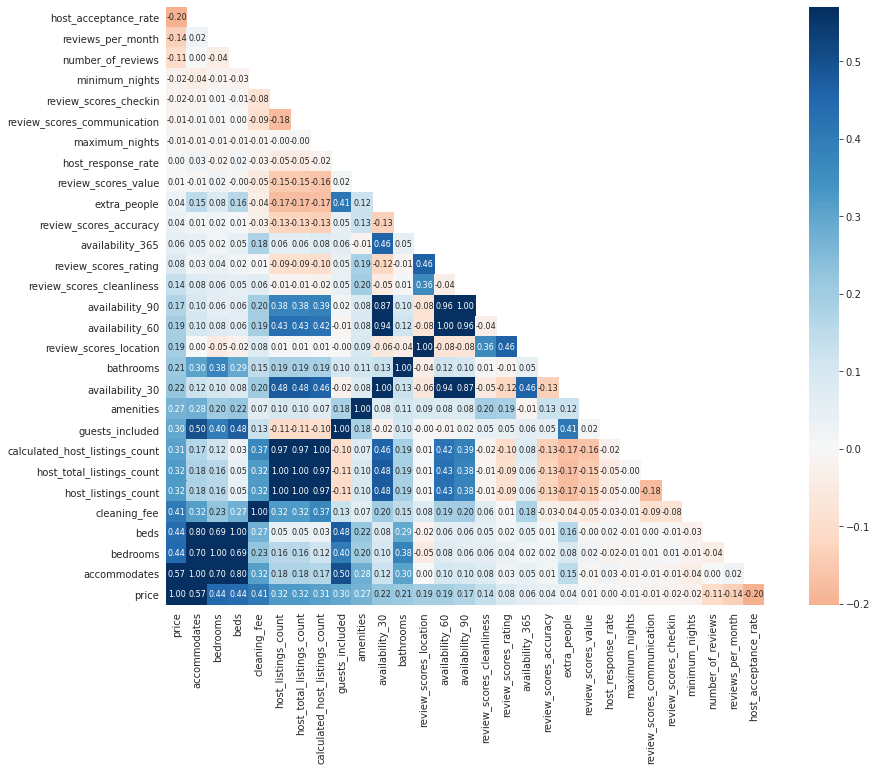

In [18]:
# heat map of corr numerical variables 
num_cols = num_cols.drop(['price'], axis=1)
num_cols = pd.concat([num_cols, listings_new['price']], axis=1)
corr = num_cols.corr().sort_values('price', axis=1, ascending=False)
corr = corr.sort_values('price', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 11))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.price.min(), 
                     vmax=corr.drop(['price'], axis=0).price.max(), center=0, square=True, 
                     annot=True, fmt='.2f',cmap='RdBu',annot_kws={"size": 8})

### Observations 

1. some mutually high correlated numerical variables:
    -  'host_total_listings_count', 'host_total_listings_count', 'calculated_host_listings_count'
    -  'availability_30', 'availability_60', 'availability_90'
2. some numerical variables that have high affect on price 
    -  'accommodates', 'bedrooms', 'beds', 'cleaning_fee'

# Discussion 1 regarding to Question 1 and Queation 2 <a class='anchor' id='Section_anws_q12_1'>

The heatmap above shows the numerical factor influence on the price, where blue indicates positive effect and orange indicates negative effect. We can see the **functionality related factors** of the listed property matters the most, such as **accommodates**, **bedrooms**, and **beds** all have high **positive** effect on the listing price, aka. incresing the listing price. Surprisingly, the **reviews per month** and **number of reviews** have a negative effect on the listing price, aka. decreasing the listing price.



## 2.7 Categorical variable analysis <a class='anchor' id='Section_2_7'>

Ragarding the categorical varibles, several factors which may affect the price are studied after taking a detailed observation of the data. The following varibles are selected based on my personal life experience and intuitive understanding.

'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'host_is_superhost', 'instant_bookable', 'cancellation_policy', 'require_guest_phone_verification', 'require_guest_profile_picture', 'is_location_exact'

In [19]:
# this is a function that will conduct a box plot for the categorical variables of interest
def categorical_variable_analysis(data, variable, response):
    '''
    INPUT
    data - pandas dataframe, holding all the columns 
    variable - str, the categorical variable of interest
    response - str, the response variable
    
    OUTPUT
    None
    '''
    order = listings_new.groupby(variable)[response].median().sort_values(ascending=False).index
    sns.boxplot(y=listings_new[response], x=listings_new[variable], order=order)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    plt.title('{}'.format(variable), fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    

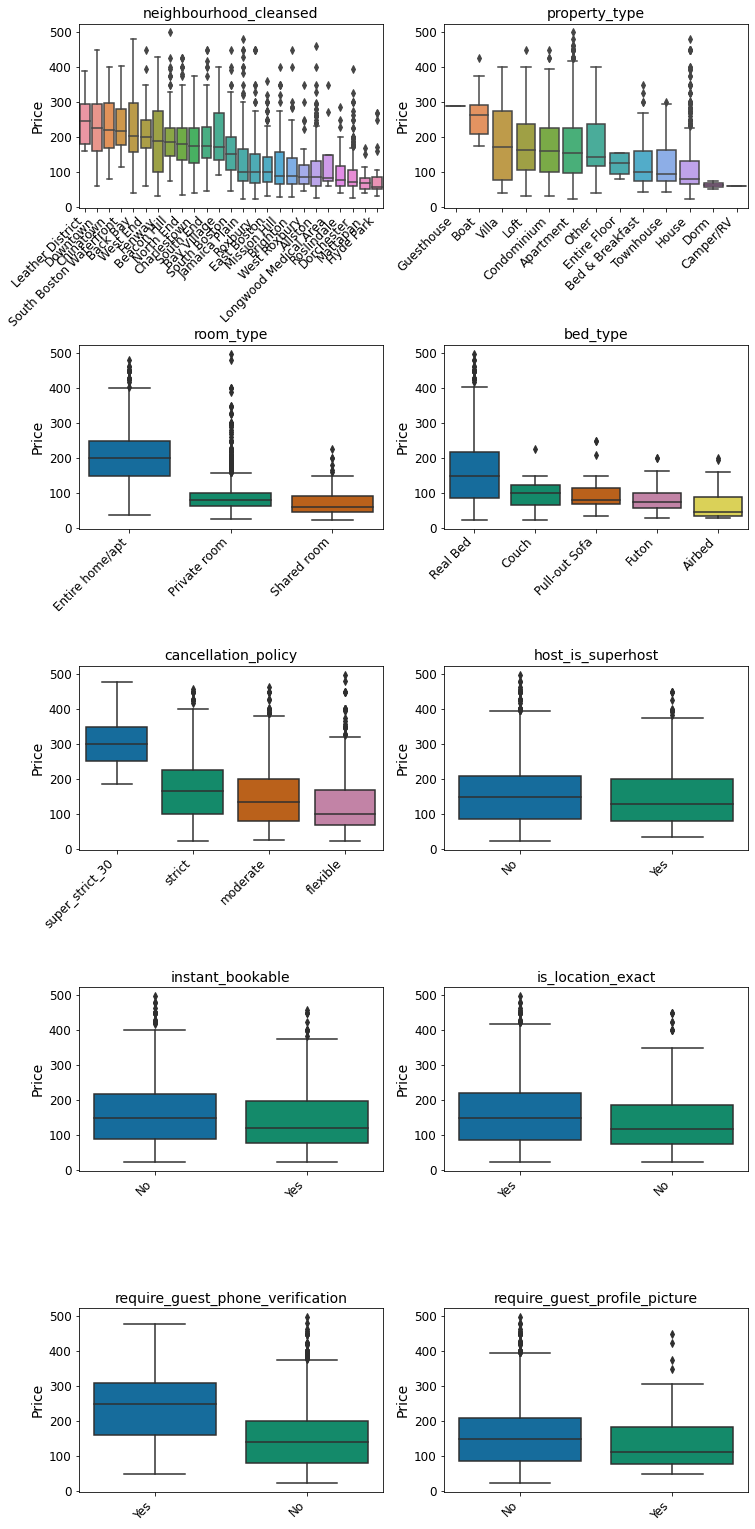

In [20]:
# categorical variables of interest that may affect price
cat_cols_index = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 
                  'cancellation_policy', 'host_is_superhost', 'instant_bookable', 
                  'is_location_exact', 'require_guest_phone_verification',
                  'require_guest_profile_picture']

plt.figure(figsize = (12, 27))
for i in range(len(cat_cols_index)):
    cat_col_index = cat_cols_index[i]
    plt_index = i+1
    plt.subplot(5,2,plt_index)
    categorical_variable_analysis(data = listings_new, variable=cat_col_index, response='price') 
    plt.subplots_adjust(hspace=0.75, wspace=0.2)
    
    if cat_col_index in ['host_is_superhost', 'instant_bookable', 'is_location_exact', 
                         'require_guest_phone_verification', 'require_guest_profile_picture']:
        locs, labels = plt.xticks()
        labels = [item.get_text() for item in labels]
#         print (labels)
        if labels ==  ['f', 't']:
            plt.xticks(np.arange(2), ('No', 'Yes'))
        else:
            plt.xticks(np.arange(2), ('Yes', 'No'))
    

### Observations¶

1. **Neighbourhood:**
As expected, the top price neighbourhoods are **Leather District**, **Downtown**, **Chinatown** and **South Boston Waterfront**, where are the **business**, **food**, and **tourist center**. 
2. **Property type:**
Guesthouse, Boat, Villa, and Loft that can give a **special** or at least **different experience** than regular home have higher price. 
3. **Room type:**
It can be observed that **entire home/apt** which can offer **most privacy** and service has the **highest** price, private room with intermediate privacy is the second, and shared room with least privacy is the last. 
4. **Bed type:**
**Comfort** matters! **Real bed** that offers most comfort have the **highest** price. The more comfort the bed can offer, the higher price, which also makes sense. 
5. **Cancellation policy:**
It seems that properties with **less price** has **more flexible** cancellation policy.
6. **Superhost:** 
**Spuperhost hosts** tend to mark their listing price **lower** than people are not. 
7. **Instant bookable:**
**Instant bookable** home tend to have **lower** price.  
8. **Location exact:**
Home with **accurate location** description tends to have **higher** price.
9. **Request guest phone verification:**
Host who require **guest phone verification** tends to have **higher** price. 
10. **Request guest profile picture:**
Host who require **guest profile picture** tends to have **lower** price. 

# Discussion 2 regarding Question 1 and Queation 2 <a class='anchor' id='Section_anws_q12_2'>

Through analysis of the categorical variables, we see that all the factors presented above affect the listing price. 

As an **existing Airbnb host** with an already listed property, a few factors can be taken into consideration to increase the listing price. 
- **Privacy matters**! The more privacy, the higher of listing price. As expected, entire home/apt which can offer most privacy and service has the highest price. Especially for hosts with shared room listing, working on the privacy level can for sure increase the listing price. For example, curtains and panels can be used to separate the shared room and increase more privacy. Note that you should highlight in your listing description that you can achieve privacy with your shared room listing, I would like to think some people will be attracted and pay a few more dollars.
- **Comfort matters**! Real bed has much higher price than others. At least for me, I would like to pay extra bucks so I can have a good sleep and feel fresh the second day. It does not matter if it is a fancy or expensive bed, but it should have the matching comfort level for the price you offer. And if you can add more details to make it more comfortable, eg. soft throws or puffy pillows, it will at least improve the overall design and catch more guests’ eyes. Remember to show it in your description as well.
- **Experience matters**! It seems that homes offering a special or at least different experience for the guests have higher listing price. I am not saying magically transform your listed property to a palace, but at least add some touch that shows your personally, the local culture or harmony with the location either nature or city, which might attract more people.
- **Accurate description**! Home with accurate description tends to have higher price, so try to pay attention to any details of your property and accurately provide all the information for your guests.

If you want to **invest** an Airbnb home. Then you should **first** pay attention to the **Neighborhoood** based on your budget. And also considers the 3 factors listed above (**privacy**, **comfort**, **experience** and **accurate discription** ) and try maximize each one within your budget.

Although other factors have relationship with the listing price, I can not draw my conclusion that they will difinitely change your listing price. For example, making your **Cancellation policy** super strict may not increase your listing price, It seems to me that properties that have more values tend to have super strict cancellation policy in order to protect the peoperty and maximize the profit. Or the **Instant bookable** factor, the box plot shows **Instant bookable** home tend to have **lower** price. It does not mean that enable this factor will decrease the price, it just indicates lower price home might need less cleaning and preparation time. But these factors for sure can be used for the price prediction.

# Question 3 Can we predict the listing price in Boston? How to select variables? <a class='anchor' id='Section_q3'>

In **section 3**, detailed explaination about how to selected variables are illustrated.  
In **section 4**, an estimator using linear regression model is established and optimaized by selecting different combinations of numerical and categorical variables.

# 3 Data preparation <a class='anchor' id='Section_3'>

It is important to select high correlated variables in order to build a more accurate model. We also need to pay attention the numbers of the selected variables. Insufficient number of variables can not achieve high accuracy, while too many variables may cause overfitting. 

In the section, the top 15 numerical variables highly correlated with the response price are selected for the price prediction initially. In addition, dummy variables are obtained for the selected categorical variables with 0, 1 encodings. Total 20 dummy variables having highest corr with price are obtained. Considering the size of the dummy variables are not large, they will be all used for the initial modeling. 

## Numerical and categorical variable selection

In [21]:
# function that selects variables according to the corr with price
def select_variables(data, response, num_variables, droped_variables):
    '''
    INPUT
    data - pandas dataframe, holding all the variables interested
    response - str, column name of the response
    num_variables - int, number of varibles used for modeling later
    droped_variables - list of strs, the variebles need to be dropped
    

    OUTPUT
    variables - pandas dataframe, output of the variables of interest based on corr with response
    '''
    corr_num = data.corr()[response].abs().sort_values(ascending=False).drop(
        droped_variables)[:num_variables]
    variables = data[corr_num.index]
    
    return variables

## 3.1 Numerical variable selection <a class='anchor' id='Section_3_1'>

Based on the heatmap plot for numerical variables in section 2.6, the highly correlated variables are removed.

The top 15 numerical variables based on the absolute corr with price are selected for the price prediction initially.

### Select top 15 numerical variables

In [22]:
# select top 15 numerical variables based on the absolute corr
# and drop the mutually high correlated variables
response = 'price'
No_num_variables = 15
high_num_correlated_variables  = ['price','host_total_listings_count',
                            'calculated_host_listings_count','availability_60',
                            'availability_90']
num_cols_selected = select_variables(num_cols, response, No_num_variables, 
                                    high_num_correlated_variables)
num_cols_new = pd.concat([num_cols['price'], num_cols_selected], axis=1)

print ('top 15 corr numerical variables')
num_cols_selected.columns

top 15 corr numerical variables


Index(['accommodates', 'bedrooms', 'beds', 'cleaning_fee',
       'host_listings_count', 'guests_included', 'amenities',
       'availability_30', 'bathrooms', 'host_acceptance_rate',
       'review_scores_location', 'review_scores_cleanliness',
       'reviews_per_month', 'number_of_reviews', 'review_scores_rating'],
      dtype='object')

### Heatmap for the corr of the selcted numerical variables

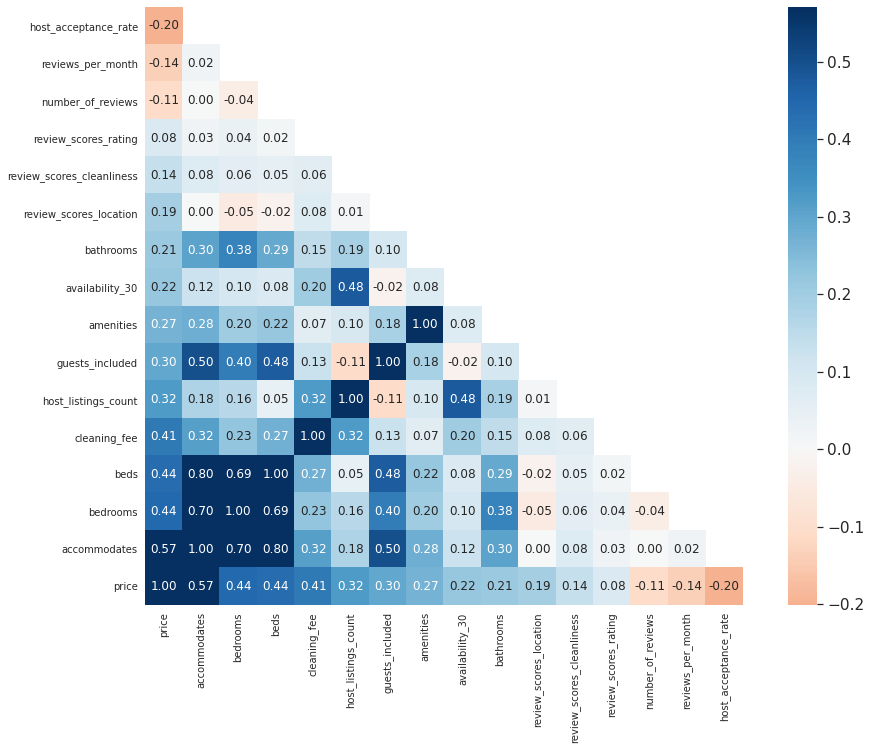

In [23]:
# heatmap of corr between the selected numerical variables and the responce price
num_corr = num_cols_new.corr().sort_values('price', axis=1, ascending=False)
num_corr = num_corr.sort_values('price', axis=0, ascending=True)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 11))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(num_corr, mask=mask, vmin=num_corr.price.min(), 
                     vmax=num_corr.drop(['price'], axis=0).price.max(), center=0, square=True, 
                     annot=True, fmt='.2f',cmap='RdBu',annot_kws={"size": 12})

## 3.2 Categorical Variables selction <a class='anchor' id='Section_3_2'>

As mentioned in section 2.7, several categorical varibles which may affect the price are studied after taking a detailed observation of the data based on my personal life experience and intuitive understanding. In addition, the box plot results also shows that the selected variables also have effect on the price.

The selected categorical varibles are: 
'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'host_is_superhost', 'instant_bookable', 'cancellation_policy', 'require_guest_phone_verification', 'require_guest_profile_picture', 'is_location_exact'

In [24]:
print ('The selected categorical varibles are:')
cat_cols_index

The selected categorical varibles are:


['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'host_is_superhost',
 'instant_bookable',
 'is_location_exact',
 'require_guest_phone_verification',
 'require_guest_profile_picture']

### Get dummy variables

In order to improve model accuracy, we will creat a new column of each level of the selected interested categorical variables. One of the main ways for working with categorical variables is using 0, 1 encodings. In this way, each level of the response will be refelcted on the price prediction. In addition, no rank of categories is imposed.

In [25]:
# extract the categorical columns 
cat_cols = listings_new[cat_cols_index]

# get dummy variables
for col in cat_cols_index:
    cat_cols = pd.concat([cat_cols.drop(col, axis=1), 
                          pd.get_dummies(cat_cols[col], prefix=col, prefix_sep='_', 
                                                       drop_first=True)], axis=1)
print ('cat_cols:')
print (cat_cols.columns)
cat_cols = pd.concat([listings_new['price'], cat_cols], axis=1)
cat_cols.shape

cat_cols:
Index(['neighbourhood_cleansed_Back Bay', 'neighbourhood_cleansed_Bay Village',
       'neighbourhood_cleansed_Beacon Hill', 'neighbourhood_cleansed_Brighton',
       'neighbourhood_cleansed_Charlestown',
       'neighbourhood_cleansed_Chinatown', 'neighbourhood_cleansed_Dorchester',
       'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_East Boston',
       'neighbourhood_cleansed_Fenway', 'neighbourhood_cleansed_Hyde Park',
       'neighbourhood_cleansed_Jamaica Plain',
       'neighbourhood_cleansed_Leather District',
       'neighbourhood_cleansed_Longwood Medical Area',
       'neighbourhood_cleansed_Mattapan',
       'neighbourhood_cleansed_Mission Hill',
       'neighbourhood_cleansed_North End', 'neighbourhood_cleansed_Roslindale',
       'neighbourhood_cleansed_Roxbury', 'neighbourhood_cleansed_South Boston',
       'neighbourhood_cleansed_South Boston Waterfront',
       'neighbourhood_cleansed_South End', 'neighbourhood_cleansed_West End',
       'neighb

(3491, 51)

### Select the top 20 categorical variables

In [26]:
# select all the categorical variables for now
No_cat_variables = 20
cat_cols_selected = select_variables(cat_cols, response, No_cat_variables, response)
cat_cols_new = pd.concat([cat_cols['price'], cat_cols_selected], axis=1)
cat_cols_selected.shape

(3491, 20)

### Heatmap for the corr of categorical variables

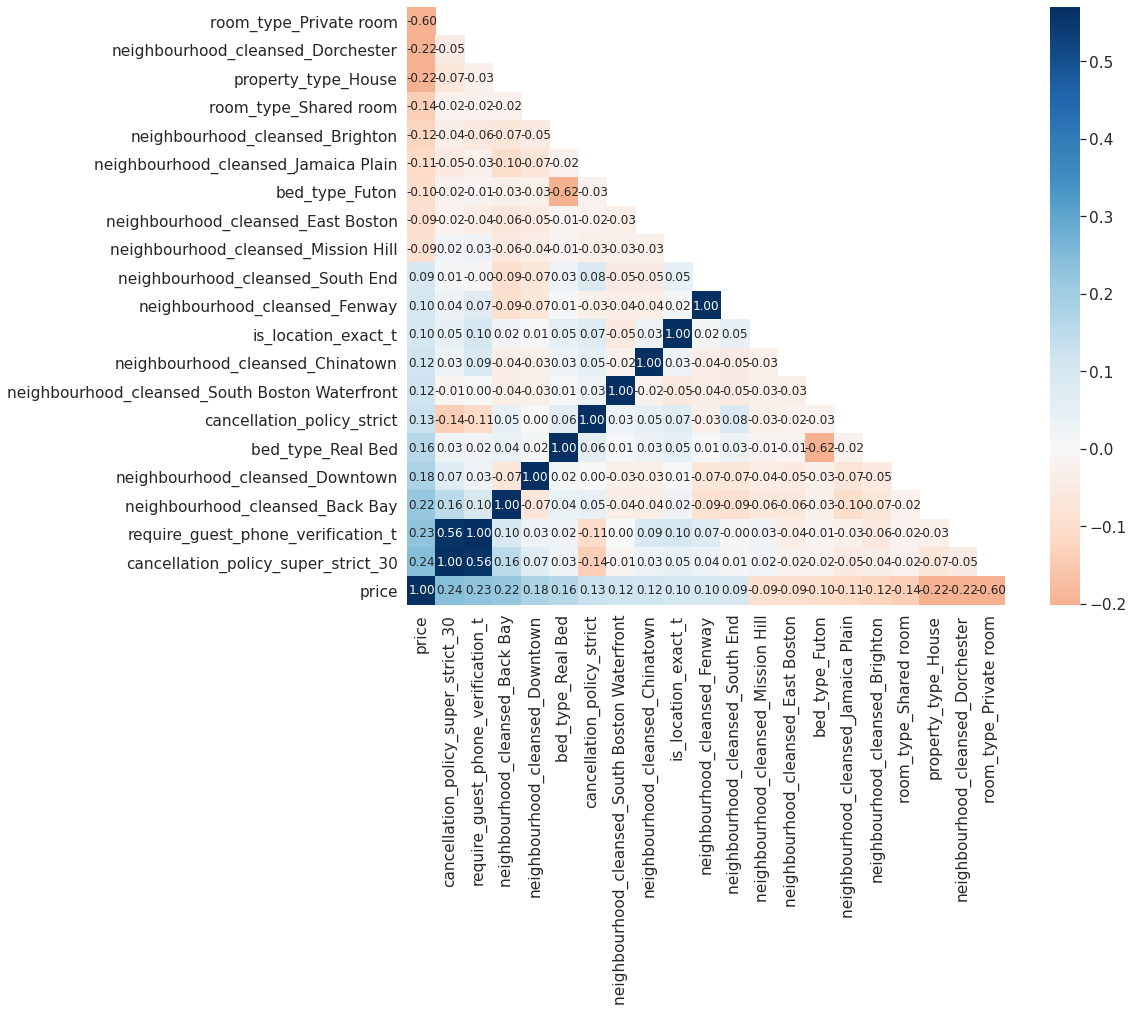

In [27]:
# heatmap of corr between the selected numerical variables and the responce price
cat_corr = cat_cols_new.corr().sort_values('price', axis=1, ascending=False)
cat_corr = cat_corr.sort_values('price', axis=0, ascending=True)
mask = np.zeros_like(cat_corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 11))
    sns.set(font_scale=1.4)
    ax = sns.heatmap(cat_corr, mask=mask, vmin=num_corr.price.min(), 
                     vmax=num_corr.drop(['price'], axis=0).price.max(), center=0, square=True, 
                     annot=True, fmt='.2f',cmap='RdBu',annot_kws={"size": 12})

## 3.3 Construct and format data <a class='anchor' id='Section_3_3'>

In [28]:
# variables
x = pd.concat([cat_cols_selected, num_cols_selected], axis=1)
# response
y = num_cols.price

test_size = 0.3
random_state = 42           
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, 
                                                    random_state = random_state)

# Disscusion about Question 3 -- How to select variables?

It is important to select **high correlated variables** in order to build a more accurate model. We also need to pay attention the numbers of the selected variables. Insufficient number of variables can not achieve high accuracy, while too many variables may cause overfitting. 

Based on the heatmap plot for numerical variables in section 2.6, the highly correlated variables are removed. The **top 15 numerical variables** based on the **absolute corr with price** are selected for the price prediction initially.

Several categorical varibles which may affect the price are studied after taking a detailed observation of the data based on my personal life experience and intuitive understanding. In addition, the box plot results in section 2.7 also **proves that the selected variables also have effect on the price**.


# 4. Data modeling and evaluation <a class='anchor' id='Section_4'>
## 4.1 LinearRegression modeling <a class='anchor' id='Section_4_1'>

In this section, LinearRegression from sklearn is used to fit the model. Through minimizing the residual sum of squares between the observed targets in the dataset, the weighting coeffcients are obtained for each selected variable and the targets are predicted by the linear approximation.

Note: 15 top corr numerical variables and 51 top corr categorical variebles are used

r2_score_test:
0.6535377532129739
r2_score_train:
0.6402384305337123


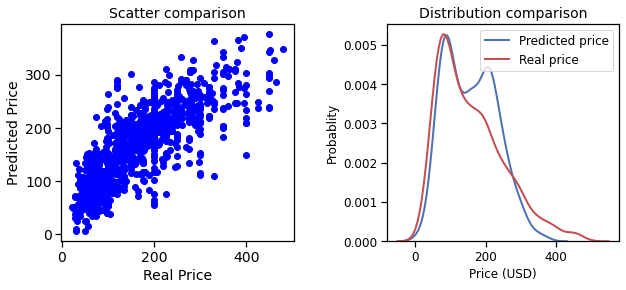

In [29]:
# LinearRegression model is used
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print ('r2_score_test:')
print (r2_scores_test)
print ('r2_score_train:')
print (r2_scores_train)

fig = plt.figure(figsize =(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Scatter comparison', fontsize=14)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

## 4.2 Evaluate the Results <a class='anchor' id='Section_4_2'> 
With the selected 15 top numerical variables and 20 categorical variables, the obtained r2 score on the test data is 0.6535, which is not a very high score.

The scatter plot shows a positive linear trend, which is as expected. However, there are still a lot of outliers indicating loss of accuracy on those points. In addition, the estimation is more accurate in the low price range (<200), since most of the data points are in that range. 

In the distribution comparison plot, the trend is similar below 200, while there is a considerable difference in the range >200, which also indicates that the estimator works better in the low price range.  

## 4.3 Find optimal LinearRegression model <a class='anchor' id='Section_4_3'>

Based on the results, different combinations of the number of top corr numerical and categorical variebles are investigated and the best combination are obtained as well as the best linear regression model.

In [30]:
# this function is used to find the best linear regression model
def find_optimal_LR(No_num_variables, No_cat_variables, num_cols, cat_cols, response,
                    high_num_correlated_variables, test_size , random_state):
    '''
    INPUT
    No_num_variables - list of ints, number of numerical vars
    No_cat_variables - list of ints, number of categorical vars
    num_cols - pandas dataframe, numerical variavles
    cat_cols - pandas dataframe, categorical variavles
    response - str, column name of the response
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    

    OUTPUT
    results - dictionary of r2 scores for different combination of number of numerical and categorical variables
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    best_r2_score_test - float, best r2 score on the test data
    best_num_variables - int, number of numerical variables for best r2 score 
    best_cat_variables - int, number of categorical variables for best r2 score 
    best_lm_model - optimal model object from sklearn
    best_x_train, best_x_test, best_y_train, best_y_test - output from sklearn train test split used for optimal model
    '''
    
    best_r2_score_test, best_num_variables, best_cat_variables, best_lm_model = 0, 0, 0, []
    best_x_train, best_x_test, best_y_train, best_y_test = [], [], [], []
    r2_scores_test, r2_scores_train, results = [], [], dict()
    for No_num in No_num_variables:
        for No_cat in No_cat_variables:
            num_cols_selected = select_variables(num_cols, response, No_num, 
                                    high_num_correlated_variables)
            cat_cols_selected = select_variables(cat_cols, response, No_cat, response)
            x = pd.concat([cat_cols_selected, num_cols_selected], axis=1)
            y = num_cols.price
            
            # split the data into train and test
            x_train, x_test, y_train, y_test = \
            train_test_split(x, y, test_size = test_size, random_state = random_state)
            
            # fit the model and obtain pred response
            lm_model = LinearRegression()
            lm_model.fit(x_train, y_train)
            y_test_preds = lm_model.predict(x_test)
            y_train_preds = lm_model.predict(x_train)
            
            # record the best model
            r2_score_test = r2_score(y_test, y_test_preds)
            if r2_score_test > best_r2_score_test:
                best_r2_score_test = r2_score_test
                best_num_variables = No_num
                best_cat_variables = No_cat
                best_lm_model = lm_model
                best_x_train, best_x_test, best_y_train, best_y_test \
                = x_train, x_test, y_train, y_test
                
            # append the r2 value from the test set
            r2_scores_test.append(r2_score_test)
            r2_scores_train.append(r2_score(y_train, y_train_preds))
            variables = str(No_num) + ' num_variables,' + str(No_cat) + ' cat_variables'
            results[variables] = r2_score(y_test, y_test_preds)

    return results, r2_scores_test, r2_scores_train, best_r2_score_test, best_num_variables, \
        best_cat_variables, best_lm_model, best_x_train, best_x_test, best_y_train, best_y_test


In [31]:
response = 'price'
No_num_variables = list(range(1, 20))
No_cat_variables = [10, 15, 20, 25, 30, 35, 40, 45, 51]
test_size = 0.3
random_state=42
# find the best combination of selection of numerical and categorical variables,  
# and return the corresponding x_train, x_test, y_train, y_test
results, r2_scores_test, r2_scores_train, best_r2_score_test, best_num_variables, \
    best_cat_variables, best_lm_model, x_train, x_test, y_train, y_test \
    = find_optimal_LR(No_num_variables, No_cat_variables, num_cols, cat_cols, response, 
                      high_num_correlated_variables, test_size , random_state)
print ('best_r2_score_test:')
print (best_r2_score_test)
print ('best_num_variables:')
print (best_num_variables)
print ('best_cat_variables:')
print (best_cat_variables)

best_r2_score_test:
0.6820983963263163
best_num_variables:
18
best_cat_variables:
51


## 4.4 Modeling with the best linear model <a class='anchor' id='Section_4_4'>

r2_score_test:
0.6820983963263163
r2_score_train:
0.6778399173533587


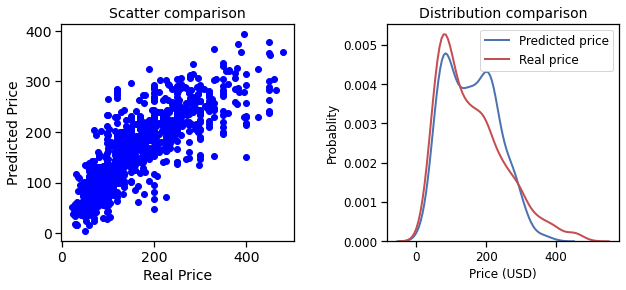

In [32]:
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print ('r2_score_test:')
print (r2_scores_test)
print ('r2_score_train:')
print (r2_scores_train)

fig = plt.figure(figsize =(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Scatter comparison', fontsize=14)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

## 4.5 Compare the Results <a class='anchor' id='Section_4_5'>

The best number of numerical and categorical variables are obtained, which are 18 and 51 respectively. With the selected variables and the best model, the obtained r2 score on the test data is 0.6821. Compared to previous model, the r2 score improved 0.029. However, the improvement is not very significant.

The scatter plot does not vary significantly compared to previous model. 

In the distribution comparison plot, an improvement in the price range below 100 has been observed compared to previous model. The predicted price distribution in that range matches with the real price better.  

## 4.6 Explore RidgeCV  <a class='anchor' id='Section_4_6'>
1. Explore that if RidgeCV can improve the estimation accuracy since the data contains variables that highly correlated. Through adding bias, the variance of the estimates can be reduced. 
2. Thorugh observing the results, it turns out that the r2 score for the test data has not been improved.

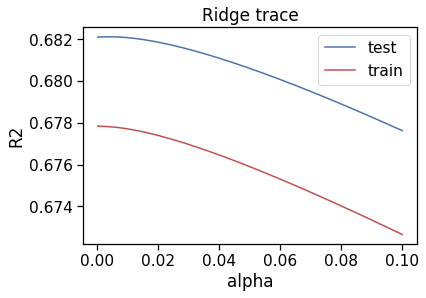

In [33]:
alphas = np.linspace(0.0001,0.1,200)
from sklearn.metrics import mean_squared_error
ridge_cofficients = []
r2_scores_test = []
r2_scores_train = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(x_train, y_train)
    y_test_preds = ridge.predict(x_test)
    r2_score_test = r2_score(y_test, y_test_preds)
    r2_scores_test.append(r2_score_test)
    y_train_preds = ridge.predict(x_train)
    r2_score_train = r2_score(y_train, y_train_preds)
    r2_scores_train.append(r2_score_train)

fig = plt.figure(1)
fig.set_facecolor('white') 
plt.plot(alphas, r2_scores_test, 'b', label = 'test')
plt.plot(alphas, r2_scores_train, 'r', label = 'train')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.axis('tight')
plt.title('Ridge trace')
plt.legend()
plt.show()  

In [34]:
# coss-validation test
ridge_cv = RidgeCV(alphas = alphas, normalize=True, cv = 5)
# , scoring="neg_mean_squared_error")
ridge_cv.fit(x_train, y_train)
# find the best alpha
alpha = ridge_cv.alpha_
print ('best alpha:')
print (alpha)

best alpha:
0.015662311557788945


r2_score_test:
0.6819704071181732
r2_score_train:
0.677547465181417


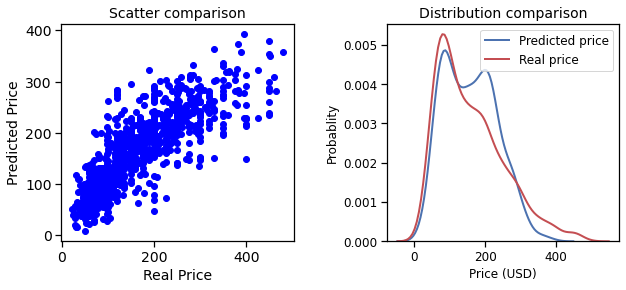

In [35]:
# lm_model = LinearRegression()
lm_model = Ridge(alpha = alpha, normalize=True)
lm_model.fit(x_train, y_train)
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)

print ('r2_score_test:')
print (r2_scores_test)
print ('r2_score_train:')
print (r2_scores_train)

fig = plt.figure(figsize =(10, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Scatter comparison', fontsize=14)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(['KDE'], prop={"size":12})
# plt.show()

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=14)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

# Disscusion about Question 3 -- Can we predict the listing price in Boston? <a class='anchor' id='Section_anws_q3'>

Yes. But with 0.682 r2 score. And the estimator works better in the low price range (<200)

Through using the aforementioned factors, we can train the data using a linear regression model and predict the listing price. To optimize the model, different combinations of numbers of numerical and categorical factors (with highest corr with price) are explored to improve the model accuracy as well as avoid overfitting.

The best estimator has a r2 score of 0.682, which is not high but still reasonable since there are so many factors we need to consider that affect the price.

The scatter plot shows a positive linear trend, which is as expected. However, there are still a lot of outliers indicating lost of accuracy on those points. In addition, the estimation is more accurate in the low price range (<200), since most of the data points are in that range. In the distribution comparison plot, the trend is similar below 200, while there is a considerable difference in the range >200, which also indicates that the estimator works better in the low price range.